<a href="https://colab.research.google.com/github/rayssaz/DIO-Analise-de-Dados-com-Python-e-Pandas/blob/main/An%C3%A1lise_Explorat%C3%B3ria_DIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Análise Exploratória de Dados**

A Análise Exploratória de Dados (AED) é usada por cientistas de dados para analisar, investigar e resumir as principais características dos conjuntos de dados, frequentemente através de métodos de visualização de dados. A AED permite determinar a melhor forma de controlar as fontes de dados para obter as respostas que você precisa, auxiliando a descoberta de padrões e anomalias, além de facilitar o teste de uma hipótese ou a verificação de suposições.
Esse é um processo importante do trabalho do cientista de dados, pois proporciona a coleta de informações e a obtenção de *insights* que vão alimentar os modelos de *Machine Learning*.

**Fontes**: 
1. [Análise Exploratória de Dados (AED): o que é, ferramentas, técnicas e exemplos | EBAC](https://ebaconline.com.br/blog/analise-exploratoria-de-dados-o-que-e)   
2. [Análise Exploratória de Dados | IBM](https://www.ibm.com/br-pt/cloud/learn/exploratory-data-analysis)

In [111]:
# Importando os pacotes
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")
import seaborn as sns


In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Datasets/AdventureWorks.xlsx")

In [ ]:
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [ ]:
# Quantidade de linhas e colunas
df.shape

(904, 16)

In [ ]:
# Verificando os tipos de dados 
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [ ]:
# Qual a Receita total?
df["Valor Venda"].sum()

5984606.1426

Para encontrar o custo total, vamos criar a coluna **custo** multiplicando o custo unitário pela quantidade:



In [ ]:
df["Custo"] = df["Custo Unitário"].mul(df["Quantidade"])

In [ ]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48


In [ ]:
# Qual o Custo Total?

round(df["Custo"].sum(),2)

2486783.05

In [ ]:
# Agora que temos a receita e custo total, podemos criar uma coluna de Lucro Totak
# O Lucro será: Receita - Custo

df["Lucro"] = df["Valor Venda"] - df["Custo"]

In [ ]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52


In [ ]:
# Lucro total
round(df["Lucro"].sum(),2)

3497823.09

In [ ]:
# Criando uma coluna com total de dias para enviar o produto
df["Tempo_envio"] = df["Data Envio"] - df["Data Venda"]

In [ ]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20 days


**Para verificar o tempo de envio médio para cada marca, vamos extrair apenas os dias da coluna *Tempo_envio* e transformá-la em numérica, visto que antes estava definida como objeto.** 

In [ ]:
# Extraindo os dias:
df["Tempo_envio"] = (df["Data Envio"] - df["Data Venda"]).dt.days

In [ ]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20


In [ ]:
# Verificando o tipo da coluna Tempo_envio
df["Tempo_envio"].dtype

dtype('int64')

In [ ]:
# Média do tempo de envio por Marca
df.groupby("Marca")["Tempo_envio"].mean()

Marca
Adventure Works    8.663866
Contoso            8.470930
Fabrikam           8.510121
Name: Tempo_envio, dtype: float64

# **Missing Values - Valores faltantes**

In [ ]:
# Verificando se existem dados faltantes
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
Custo             0
Lucro             0
Tempo_envio       0
dtype: int64

**Como encontrar o lucro por ano e por marca?**

In [ ]:
# Agrupando por ano e marca:
df.groupby([df["Data Venda"].dt.year, "Marca"])["Lucro"].sum()

Data Venda  Marca          
2008        Adventure Works    3.066412e+05
            Contoso            5.641600e+04
            Fabrikam           1.557021e+06
2009        Adventure Works    4.053951e+05
            Contoso            1.382590e+05
            Fabrikam           1.034091e+06
Name: Lucro, dtype: float64

In [ ]:
# Ajustando as unidades dos valores de Lucro através do método format
pd.options.display.float_format = '{:20,.2f}'.format

In [ ]:
# Resetando o index para organizar os dados em formato tabular e de planilha:
# Esse formato possibilita exportar os dados para um arquivo excel ou criar outro dataframe
lucro_ano = df.groupby([df["Data Venda"].dt.year, "Marca"])["Lucro"].sum().reset_index()
lucro_ano

,Data Venda,Marca,Lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


**Qual o total de produtos vendidos?**


In [ ]:
# Total de produtos vendidos
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

In [ ]:
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=False).reset_index()

,Produto,Quantidade
0,Headphone Adapter for Contoso Phone E130 Silver,25232
1,Headphone Adapter for Contoso Phone E130 White,25008
2,Adventure Works Laptop15.4W M1548 Black,1089
3,Fabrikam Trendsetter 2/3'' 17mm X100 Grey,1087
4,Adventure Works Laptop15.4W M1548 Red,1047
5,Fabrikam Trendsetter 2/3'' 17mm X100 Black,926
6,Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,884
7,Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey,845
8,Fabrikam Trendsetter 1/3'' 8.5mm X200 White,789


# **Visualização dos dados - Gráficos**

**Total de produtos vendidos:**

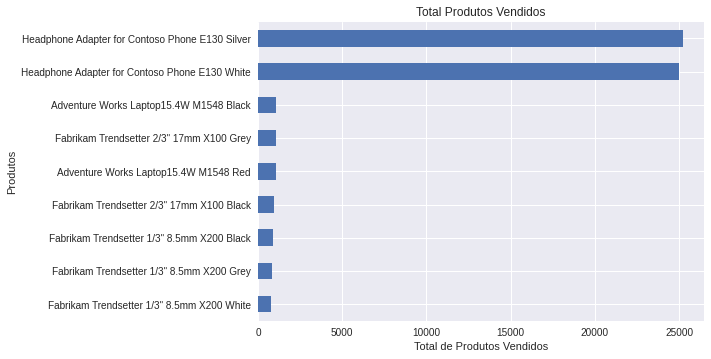

In [ ]:
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=True).plot.barh(title="Total Produtos Vendidos")
plt.xlabel("Total de Produtos Vendidos")
plt.ylabel("Produtos");

**Lucro por ano:**

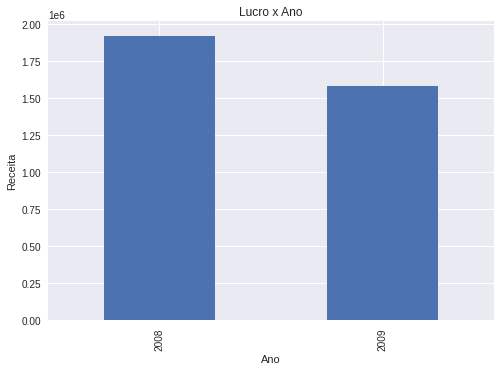

In [ ]:
df.groupby(df["Data Venda"].dt.year)["Lucro"].sum().plot.bar(title="Lucro x Ano")
plt.xlabel("Ano")
plt.ylabel("Receita");

In [ ]:
# Definindo o Lucro por Ano
df.groupby(df["Data Venda"].dt.year)["Lucro"].sum()

Data Venda
2008           1,920,077.71
2009           1,577,745.38
Name: Lucro, dtype: float64

In [ ]:
# Selecionando apenas as vendas de 2009
df_2009 = df[df["Data Venda"].dt.year == 2009]

In [ ]:
df_2009.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_envio
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
12,2009-05-16,2009-05-27,306,384,19067,200905163CS746,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",11
13,2009-05-31,2009-06-12,306,384,19068,200905313CS748,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
14,2009-06-28,2009-07-11,199,384,18959,200906283CS870,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",13
15,2009-07-08,2009-07-12,306,384,19070,200907083CS757,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",4


**Lucro por Mês:**

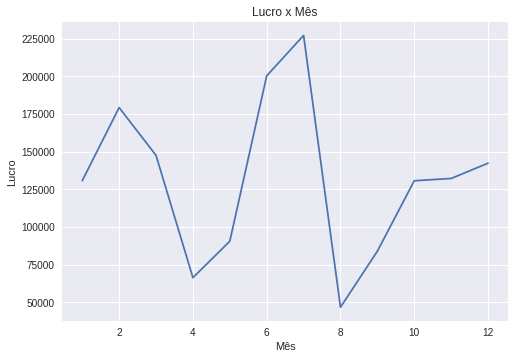

In [ ]:
df_2009.groupby(df_2009["Data Venda"].dt.month)["Lucro"].sum().plot(title="Lucro x Mês")
plt.xlabel("Mês")
plt.ylabel("Lucro");

**Lucro por Marca:**

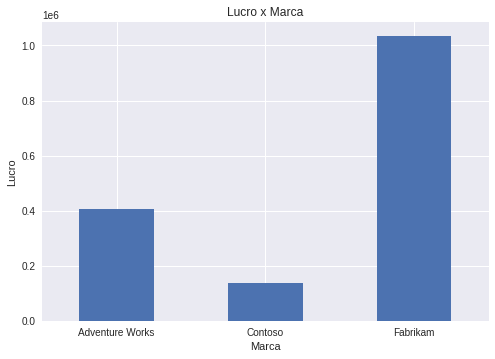

In [ ]:
# O xticks() rotaciona a legenda dos dados do eixo x

df_2009.groupby("Marca")["Lucro"].sum().plot.bar(title="Lucro x Marca")
plt.xlabel("Marca")
plt.ylabel("Lucro")
plt.xticks(rotation="horizontal");

**Lucro por Classe:**

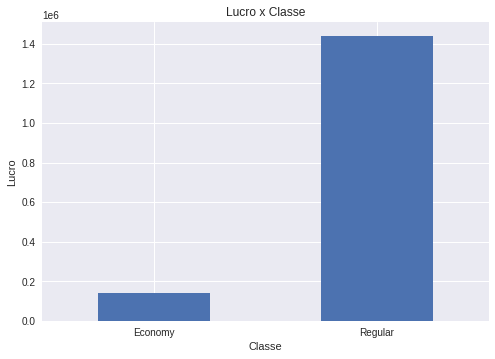

In [ ]:
df_2009.groupby("Classe")["Lucro"].sum().plot.bar(title="Lucro x Classe")
plt.xlabel("Classe")
plt.ylabel("Lucro")
plt.xticks(rotation='horizontal');

**Vamos usar medidas estatísticas para avaliar o Tempo de Envio dos produtos através do método *describe()*** 

In [ ]:
df["Tempo_envio"].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: Tempo_envio, dtype: float64

In [ ]:
# Quantidade de Produtos
df["Produto"].value_counts().sum()

904

# **Boxplots**
Os Boxplots (diagramas de caixa) mostram a distribuição quantitativa dos dados, de modo a facilitar a comparação entre as variáveis.

A caixa mostra os quartis do dataset enquanto os *whiskers* (linhas que estão nas extremidades) mostram o resto da distribuição, exceto os pontos isolados que são chamados **outliers**, os quais consistem em valores discrepantes no conjunto de dados.

A linha verde mostrada no interior do boxplot corresponde a **mediana (50%)** da distribuição dos dados, enquanto a base e o topo da caixa representam, respectivamente, os quartis de 25% e 75%. 


**Fonte:** [Melhorando a Análise com o Boxplot | Alura](https://www.alura.com.br/artigos/melhorando-a-analise-com-o-boxplot#:~:text=O%20que%20%C3%A9%20um%20BoxPlot,dos%20n%C3%ADveis%20categ%C3%B3ricos%20das%20vari%C3%A1veis.)

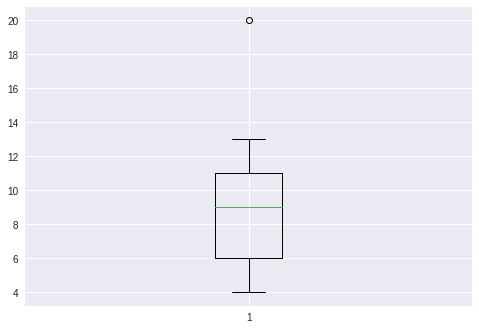

In [ ]:
#Gráfico de Boxplot
plt.boxplot(df["Tempo_envio"]);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


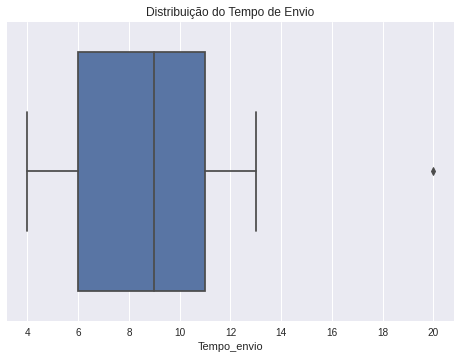

In [108]:
sns.boxplot(df["Tempo_envio"])
plt.title('Distribuição do Tempo de Envio')
plt.show();

**Verificando se as informações extraídas do boxplot são verdadeiras:**

In [ ]:
#Tempo mínimo de envio
df["Tempo_envio"].min()

4

In [ ]:
#Tempo máximo de envio
df['Tempo_envio'].max()

20

**Identificando a linha do Outlier:**

In [ ]:
df[df["Tempo_envio"] == 20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


# **Histogramas**

Um histograma é uma espécie de gráfico de barras que demonstra uma distribuição de frequências. No histograma, a base de cada uma das barras representa uma classe e a altura representa a quantidade ou frequência absoluta com que o valor de cada classe ocorre. Ao mesmo tempo, ele pode ser utilizado como um indicador de dispersão de processos.

**Fonte:** [Histograma: O que é, Exemplos, Gráficos e Tipos | Alura](https://www.alura.com.br/artigos/o-que-e-um-histograma)

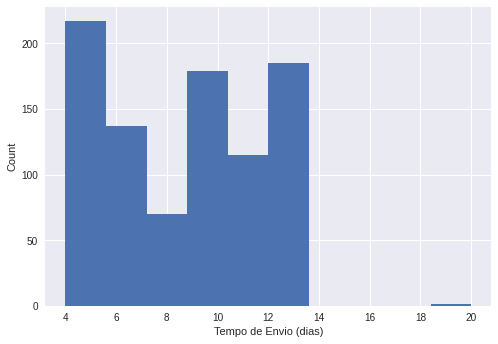

In [109]:
#Histograma
plt.hist(df["Tempo_envio"])
plt.xlabel("Tempo de Envio (dias)")
plt.ylabel("Count");

# **Dataframe para CSV**
Transferindo o novo dataframe para um arquivo CSV, que ficará armazenado na pasta pertencente aos dados.

In [110]:
df.to_csv("df_vendas_novo.csv", index=False)